In [1]:
# Import relevant libraries

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() # set the default Seaborn style for graphics

In [2]:
# Read in the datasets

performance_lang = pd.read_csv('performance_lang.csv')
performance_math = pd.read_csv('performance_math.csv')

Description of dataset

> **School** - Student's school (binary: "SchoolA" or "SchoolB")  
> **Gender** - Student's gender (binary: "Female" or "Male")  
> **Age** - Student's age (numeric)  
> **Residence** - Student's residence type (binary: "Urban" or "Rural")  
> **MomEdu** - Mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)  
> **DadEdu** - Father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)  
> **MomJob** - Mother's job (nominal: "Teacher", "HealthCare", "CivilService", "AtHome" or "Other")  
> **DadJob** - Father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")  
> **TravelTime** - Home to School travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)  
> **StudyTime** - Weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)  
> **PastFails** - Number of past class failures (numeric: n if 1<=n<3, else 4)  
> **SchoolSup** - Extra educational support (binary: yes or no)  
> **FamilySup** - Family educational support (binary: yes or no)  
> **PaidSup** - Extra paid classes for the course (binary: yes or no)  
> **Activities** - Extra-curricular activities (binary: yes or no)  
> **Internet** - Internet access at home (binary: yes or no)  
> **Romantic** - In a romantic relationship (binary: yes or no)  
> **FamilyRel** - Quality of family relationships (numeric: from 1 - very bad to 5 - excellent)  
> **FreeTime** - Free time after school (numeric: from 1 - very low to 5 - very high)  
> **GoingOut** - Going out with friends (numeric: from 1 - very low to 5 - very high)  
> **Health** - Current health status (numeric: from 1 - very bad to 5 - very good)  
> **Absences** - Number of school absences (numeric)  
> **T1** - Term 1 grade (numeric: from 0 to 20)  
> **T2** - Term 2 grade (numeric: from 0 to 20)  
> **T3** - Term 3 grade (numeric: from 0 to 20)  


Quick look at the info and head of the datasets to check for any null values as well as the type of variables present

In [3]:
performance_lang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   School      649 non-null    object
 1   Gender      649 non-null    object
 2   Age         649 non-null    int64 
 3   Residence   649 non-null    object
 4   MomEdu      649 non-null    int64 
 5   DadEdu      649 non-null    int64 
 6   MomJob      649 non-null    object
 7   DadJob      649 non-null    object
 8   TravelTime  649 non-null    int64 
 9   StudyTime   649 non-null    int64 
 10  PastFails   649 non-null    int64 
 11  SchoolSup   649 non-null    object
 12  FamilySup   649 non-null    object
 13  PaidSup     649 non-null    object
 14  Activities  649 non-null    object
 15  Internet    649 non-null    object
 16  Romantic    649 non-null    object
 17  FamilyRel   649 non-null    int64 
 18  FreeTime    649 non-null    int64 
 19  GoingOut    649 non-null    int64 
 20  Health    

In [4]:
performance_math.info()

# There are differences in the number of entries for both datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   School      395 non-null    object
 1   Gender      395 non-null    object
 2   Age         395 non-null    int64 
 3   Residence   395 non-null    object
 4   MomEdu      395 non-null    int64 
 5   DadEdu      395 non-null    int64 
 6   MomJob      395 non-null    object
 7   DadJob      395 non-null    object
 8   TravelTime  395 non-null    int64 
 9   StudyTime   395 non-null    int64 
 10  PastFails   395 non-null    int64 
 11  SchoolSup   395 non-null    object
 12  FamilySup   395 non-null    object
 13  PaidSup     395 non-null    object
 14  Activities  395 non-null    object
 15  Internet    395 non-null    object
 16  Romantic    395 non-null    object
 17  FamilyRel   395 non-null    int64 
 18  FreeTime    395 non-null    int64 
 19  GoingOut    395 non-null    int64 
 20  Health    

In [5]:
performance_lang.head()

,School,Gender,Age,Residence,MomEdu,DadEdu,MomJob,DadJob,TravelTime,StudyTime,...,Internet,Romantic,FamilyRel,FreeTime,GoingOut,Health,Absences,T1,T2,T3
0,SchoolA,Female,18,Urban,4,4,AtHome,Teacher,2,2,...,No,No,4,3,4,3,4,0,11,11
1,SchoolA,Female,17,Urban,1,1,AtHome,Other,1,2,...,Yes,No,5,3,3,3,2,9,11,11
2,SchoolA,Female,15,Urban,1,1,AtHome,Other,1,2,...,Yes,No,4,3,2,3,6,12,13,12
3,SchoolA,Female,15,Urban,4,2,HealthCare,CivilService,1,3,...,Yes,Yes,3,2,2,5,0,14,14,14
4,SchoolA,Female,16,Urban,3,3,Other,Other,1,2,...,No,No,4,3,2,5,0,11,13,13


In [6]:
performance_math.head()

,School,Gender,Age,Residence,MomEdu,DadEdu,MomJob,DadJob,TravelTime,StudyTime,...,Internet,Romantic,FamilyRel,FreeTime,GoingOut,Health,Absences,T1,T2,T3
0,SchoolA,Female,18,Urban,4,4,AtHome,Teacher,2,2,...,No,No,4,3,4,3,6,5,6,6
1,SchoolA,Female,17,Urban,1,1,AtHome,Other,1,2,...,Yes,No,5,3,3,3,4,5,5,6
2,SchoolA,Female,15,Urban,1,1,AtHome,Other,1,2,...,Yes,No,4,3,2,3,10,7,8,10
3,SchoolA,Female,15,Urban,4,2,HealthCare,CivilService,1,3,...,Yes,Yes,3,2,2,5,2,15,14,15
4,SchoolA,Female,16,Urban,3,3,Other,Other,1,2,...,No,No,4,3,2,5,4,6,10,10


In [7]:
performance_lang['School'].value_counts()

SchoolA    423
SchoolB    226
Name: School, dtype: int64

In [8]:
performance_math['School'].value_counts()

SchoolA    349
SchoolB     46
Name: School, dtype: int64

Extract common students between the 2 datasets by comparing their attributes except marks

In [9]:
# Create a list of conditions for me to merge my data
conditions = []

for i in performance_math:
    if i == "T1":
        pass
    elif i == "T2":
        pass
    elif i == "T3":
        pass
    else:
        conditions.append(i)

In [10]:
commonstudents = pd.merge(performance_math, performance_lang, on = conditions)

In [11]:
# Rename the columns
commonstudents = commonstudents.rename(columns = {"T1_x": "T1_Math", "T2_x": "T2_Math", "T3_x": "T3_Math", "T1_y": "T1_Lang","T2_y": "T2_Lang", "T3_y": "T3_Lang"})

In [12]:
# Quick look at the shape to see how many students there are, this data may be useful for us later
commonstudents.shape

(39, 28)

`QUESTION 1`: Does the **family background**, **family relationship** and **family support** influence a student's **performance**?

A **student's performance** can be judged based on either their total marks for all 3 terms or their average marks over the 3 terms.  
Because average = total marks/3, the boxplots will look the same for both variables. So for simplicity, average is chosen for this analysis.  


There is no variable named family background so we will define one's family background using other variables available.  
For this dataset, family background will be split into different parts.   
Family background includes 
- `Family education background` where it is `"MomEdu + DadEdu"`
- `Family job background` where we analyse the different jobs that the parents hold
- `Residence`

**Family background, family relationship** and **family support** are all categorical variables.

In [13]:
# Prepare the data required for average
average_math = pd.DataFrame((performance_math.T1 + performance_math.T2 + performance_math.T3) / 3, columns = ['MathAverage'])
average_lang = pd.DataFrame((performance_lang.T1 + performance_lang.T2 + performance_lang.T3) / 3, columns = ['LangAverage'])

# Family Background VS Student's Performance

In [14]:
# Prepare the relevant data required for family education background analysis
performance_lang['FamilyEduBG'] = performance_lang['MomEdu'] + performance_lang['DadEdu']
performance_math['FamilyEduBG'] = performance_math['MomEdu'] + performance_math['DadEdu']
FEBG_math = pd.DataFrame(performance_math['FamilyEduBG'])
FEBG_lang = pd.DataFrame(performance_lang['FamilyEduBG'])

**`Family Education Background VS Math Performance`**

<AxesSubplot:xlabel='MathAverage', ylabel='FamilyEduBG'>

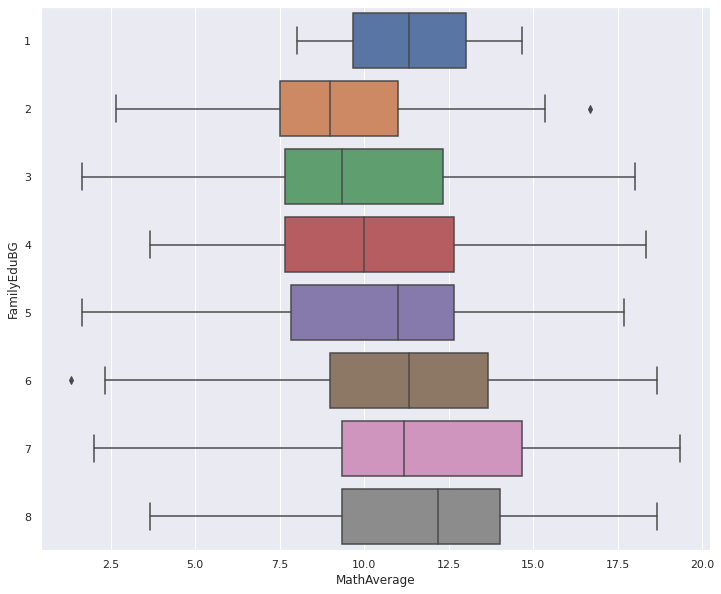

In [15]:
# Plot the boxplots for FamilyEduBG and Average to try and identify any relationship
FEBGmarks_math = pd.concat([FEBG_math, average_math], axis = 1)

f = plt.figure(figsize = (12,10))
sb.boxplot(x = 'MathAverage', y = 'FamilyEduBG', data = FEBGmarks_math, orient = 'h')

From FamilyEduBG = 2 to FamilyEduBG = 8, as the number increase we see that the students on average either do better or perform similarly.  
But there is a `weird behaviour` for FamilyEduBG = 1. We can further analyse the general behaviour by looking at the number of datapoints available for each FamilyEduBG categories. 

In [16]:
FEBG_math.value_counts(ascending = True)

FamilyEduBG
1               2
2              39
3              43
5              47
7              58
6              64
8              70
4              72
dtype: int64

Indeed, FamilyEduBG = 1 only has 2 datapoints which are insufficient to make any judgment. We can ignore that category for this analysis.   


In [17]:
# We remove datapoints that has FamilyBG = 1 and plot the boxplots again to observe any relationship
FEBGmarks_math = FEBGmarks_math[FEBGmarks_math.FamilyEduBG != 1]

**`Family Education Background VS Language Performance`**

In [18]:
# Before any boxplot, we remove FamilyEduBG categories that has insufficient datapoints for comparison
performance_lang['FamilyEduBG'].value_counts(ascending = True)

0      1
1      7
7     67
5     77
3     88
6     89
2     95
8     95
4    130
Name: FamilyEduBG, dtype: int64

In [19]:
# We remove datapoints where FamilyBG = 0 or 1 since they only have 1 and 7 datapoints respectively
FEBGmarks_lang = pd.concat([FEBG_lang, average_lang], axis = 1)
FEBGmarks_lang = FEBGmarks_lang[FEBGmarks_lang['FamilyEduBG'] != 0] 
FEBGmarks_lang = FEBGmarks_lang[FEBGmarks_lang['FamilyEduBG'] != 1] 

<AxesSubplot:xlabel='MathAverage', ylabel='FamilyEduBG'>

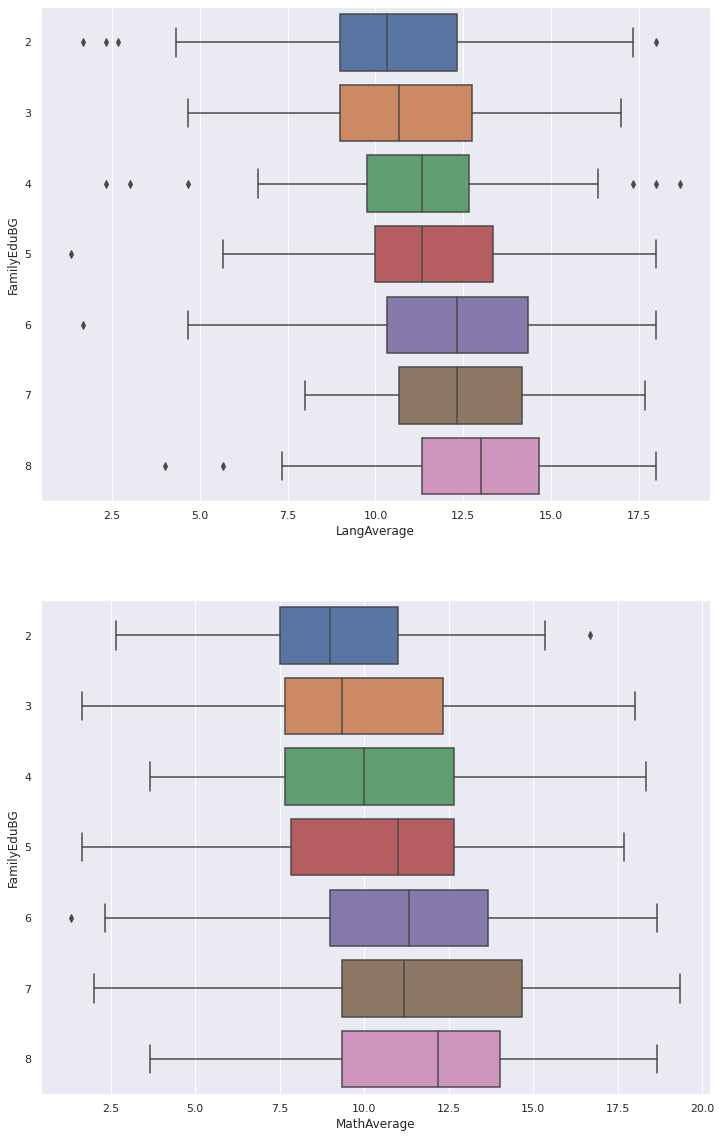

In [20]:
# After we have cleaned the dataset, we look at the boxplots together to draw conclusions
f,axes = plt.subplots(2, 1, figsize = (12,20))
sb.boxplot(x = 'LangAverage', y = 'FamilyEduBG', data = FEBGmarks_lang, orient = 'h', ax = axes[0])
sb.boxplot(x = 'MathAverage', y = 'FamilyEduBG', data = FEBGmarks_math, orient = 'h', ax = axes[1])

In [21]:
# Print only the math mean value for each category
int_arr = [2,3,4,5,6,7,8]

for i in int_arr:
    print(f'Math mean for FamilyEdu({i}):', 
          FEBGmarks_math[FEBGmarks_math.FamilyEduBG == i].MathAverage.mean().round(2))

Math mean for FamilyEdu(2): 9.08
Math mean for FamilyEdu(3): 9.69
Math mean for FamilyEdu(4): 10.16
Math mean for FamilyEdu(5): 10.62
Math mean for FamilyEdu(6): 11.2
Math mean for FamilyEdu(7): 11.25
Math mean for FamilyEdu(8): 11.79


In [22]:
# Print only the language mean value for each category
int_arr = [2,3,4,5,6,7,8]

for i in int_arr:
    print(f'Lang mean for FamilyEdu({i}):', 
          FEBGmarks_lang[FEBGmarks_lang.FamilyEduBG == i].LangAverage.mean().round(2))

Lang mean for FamilyEdu(2): 10.49
Lang mean for FamilyEdu(3): 10.92
Lang mean for FamilyEdu(4): 11.29
Lang mean for FamilyEdu(5): 11.57
Lang mean for FamilyEdu(6): 12.14
Lang mean for FamilyEdu(7): 12.56
Lang mean for FamilyEdu(8): 12.81


From the 2 box plots we can see that the general trend is that as the FamilyBG gets better, the boxes shift to the right which suggest that an improvement in the student's performance. 
We also can see that the mean marks for each FamilyEduBG category increase as the category increase.

Hence, I conclude that `family education background` positively influence a student's performance.

**`Family Job Background VS Student's Performance`**

In [23]:
parentsjob_math = pd.DataFrame(performance_math[['MomJob', 'DadJob']])
parentsjob_lang = pd.DataFrame(performance_lang[['MomJob', 'DadJob']])

We look at the value counts for jobs to identify outliers.

In [24]:
valuecounts = pd.concat([parentsjob_math.DadJob.value_counts(), parentsjob_math.MomJob.value_counts(), parentsjob_lang.DadJob.value_counts(), parentsjob_lang.MomJob.value_counts()], axis = 1)
valuecounts

,DadJob,MomJob,DadJob,MomJob
Other,217,141,367,258
CivilService,111,103,181,136
Teacher,29,58,36,72
AtHome,20,59,42,135
HealthCare,18,34,23,48


In [25]:
parentsjobmarks_math = pd.concat([parentsjob_math, average_math], axis = 1)
parentsjobmarks_lang = pd.concat([parentsjob_lang, average_lang], axis = 1)

<AxesSubplot:xlabel='LangAverage', ylabel='MomJob'>

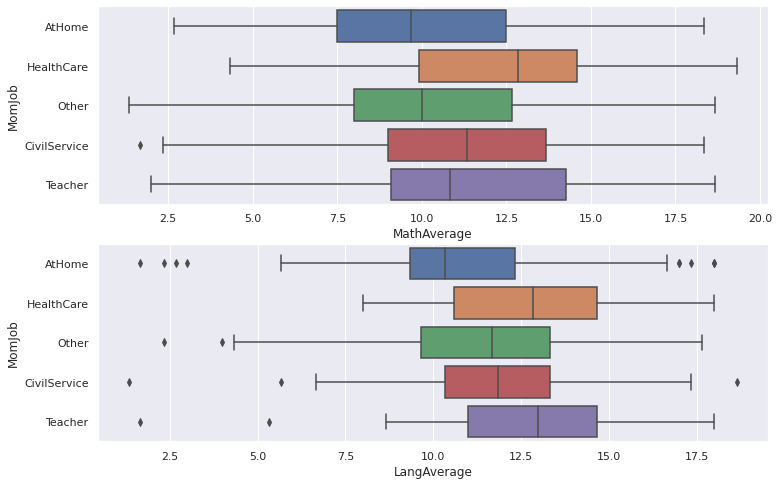

In [26]:
f, axes = plt.subplots(2,1,figsize = (12,8))
sb.boxplot(x = 'MathAverage', y = 'MomJob', data = parentsjobmarks_math, orient = 'h', ax = axes[0])
sb.boxplot(x = 'LangAverage', y = 'MomJob', data = parentsjobmarks_lang, orient = 'h', ax = axes[1])

<AxesSubplot:xlabel='LangAverage', ylabel='DadJob'>

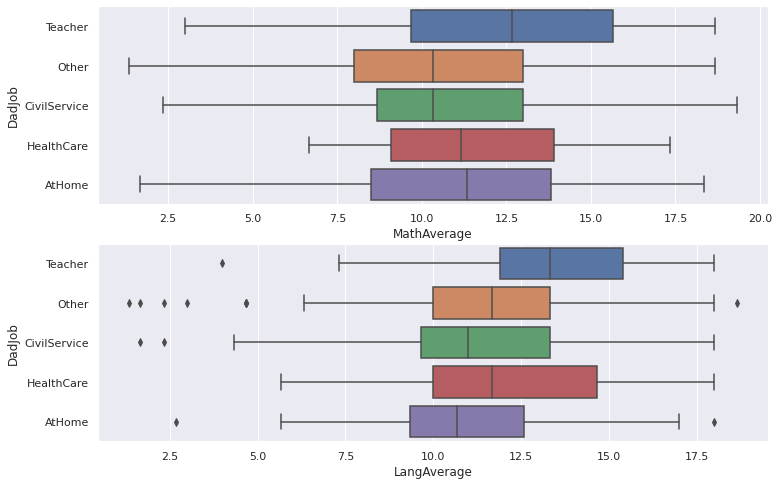

In [27]:
f, axes = plt.subplots(2,1,figsize = (12,8))
sb.boxplot(x = 'MathAverage', y = 'DadJob', data = parentsjobmarks_math, orient = 'h', ax = axes[0])
sb.boxplot(x = 'LangAverage', y = 'DadJob', data = parentsjobmarks_lang, orient = 'h', ax = axes[1])

By looking at the `1st Quartile, Median and 3rd Quartile`...

The first plot suggest that students with mothers who work in the healthcare sectors and as teachers performed  better in both math and language.   

In the second plot, we see that students with fathers who work as a teacher performed much better for both subjects. In addition, students with fathers who work in the healthcare sector also performed better in their language.  

Let's look at the mean to see if the observations are similar.

In [28]:
# Extract out the different occupations that are in the dataset.
jobs = parentsjob_lang.DadJob.unique()

# Print the subject mean according to their parents' jobs.
print("--MOM'S JOB--")
for i in jobs:
    print(f"Math mean for Mom's Job ({i}):", 
          parentsjobmarks_math[parentsjobmarks_math.MomJob == i].MathAverage.mean().round(2))
    print(f"Language mean for Mom's Job ({i}):", 
          parentsjobmarks_lang[parentsjobmarks_lang.MomJob == i].LangAverage.mean().round(2))
    print()

print("--DAD'S JOB--")
for i in jobs:
    print(f"Math mean for Dad's Job ({i}):", 
          parentsjobmarks_math[parentsjobmarks_math.DadJob == i].MathAverage.mean().round(2))
    print(f"Language mean for Dad's Job ({i}):", 
          parentsjobmarks_lang[parentsjobmarks_lang.DadJob == i].LangAverage.mean().round(2))
    print()

--MOM'S JOB--
Math mean for Mom's Job (Teacher): 11.27
Language mean for Mom's Job (Teacher): 12.8

Math mean for Mom's Job (Other): 10.06
Language mean for Mom's Job (Other): 11.46

Math mean for Mom's Job (CivilService): 11.21
Language mean for Mom's Job (CivilService): 11.83

Math mean for Mom's Job (HealthCare): 12.24
Language mean for Mom's Job (HealthCare): 12.7

Math mean for Mom's Job (AtHome): 9.76
Language mean for Mom's Job (AtHome): 10.74

--DAD'S JOB--
Math mean for Dad's Job (Teacher): 12.29
Language mean for Dad's Job (Teacher): 13.32

Math mean for Dad's Job (Other): 10.39
Language mean for Dad's Job (Other): 11.6

Math mean for Dad's Job (CivilService): 10.67
Language mean for Dad's Job (CivilService): 11.43

Math mean for Dad's Job (HealthCare): 11.48
Language mean for Dad's Job (HealthCare): 12.29

Math mean for Dad's Job (AtHome): 10.82
Language mean for Dad's Job (AtHome): 10.87



Students whose mothers are **teachers** or work in a **healthcare** sector had a high mean, **12.8 and 12.7** respectively, for language. Students whose mothers work in a **healthcare** sector had the highest mean of 12.24 for math. This suggest that students tend to `perform better` when their mothers work as **teachers** or in a **healthcare sector**.


Students whose fathers are **teachers** had a highest mean for both **language (13.32) and math (12.29)** which suggest that they `performed better`. Students whose fathers work in the **healthcare sector** had a second highest mean for both **language (12.29) and math (11.48)**. It is `consistent` with our boxplot observations.

As such, students whose **parents** work in either healthcare sector or as teachers tend to `perform better`.

**`Residence VS Student's Performance`**

In [29]:
residence_math = pd.DataFrame(performance_math.Residence)
residence_lang = pd.DataFrame(performance_lang.Residence)

In [30]:
# Look at the value counts to identify potential outliers
print(residence_math.value_counts(), '\n')
print(residence_lang.value_counts())

Residence
Urban        307
Rural         88
dtype: int64 

Residence
Urban        452
Rural        197
dtype: int64


In [31]:
residencemarks_math = pd.concat([residence_math, average_math], axis = 1)
residencemarks_lang = pd.concat([residence_lang, average_lang], axis = 1)

<AxesSubplot:xlabel='LangAverage', ylabel='Residence'>

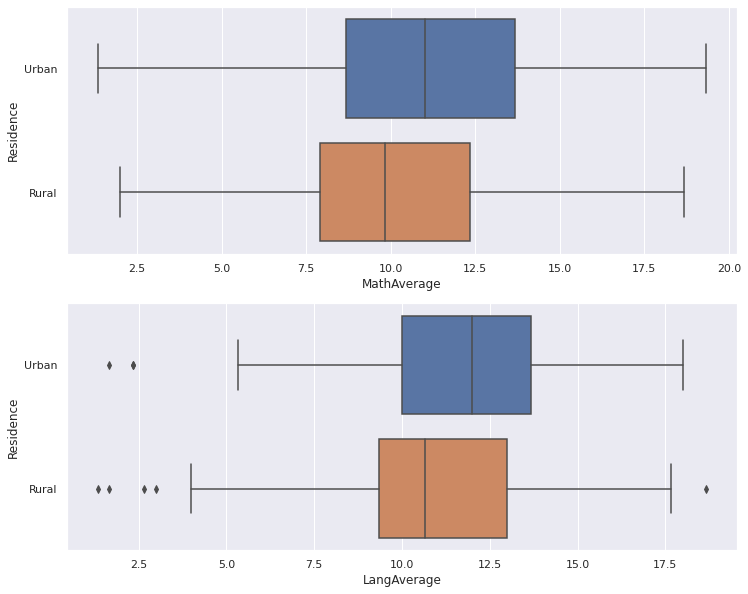

In [32]:
f, axes = plt.subplots(2,1,figsize = (12,10))
sb.boxplot(x = 'MathAverage', y = 'Residence', data = residencemarks_math, orient = 'h', ax = axes[0])
sb.boxplot(x = 'LangAverage', y = 'Residence', data = residencemarks_lang, orient = 'h', ax = axes[1])

In [33]:
# Print only the mean value for each category

typeofresidence = residencemarks_math.Residence.unique()

for i in typeofresidence:
    print(f'Math mean for students living in {i}:',
          residencemarks_math[residencemarks_math.Residence == i].MathAverage.mean().round(2))
    
print('\n')
for i in typeofresidence:
    print(f'Language mean for students living in {i}:',
          residencemarks_lang[residencemarks_lang.Residence == i].LangAverage.mean().round(2))

Math mean for students living in Urban: 10.89
Math mean for students living in Rural: 9.94


Language mean for students living in Urban: 11.94
Language mean for students living in Rural: 10.91


For both subjects, the mean for students living in `urban` is **slightly higher** than those living in `rural` area.
We also see from the boxplots that the box for students living in the `urban` is **slightly more to the right** which suggest better performance. 

Students who live in the `urban` generally perform **slightly better** than sudents who live in the `rural`.  
The residence the students live in does influence their performance but to a `small extent`.

In conclusion... 

Within family background, the more influential factors are `family education background` the `parents' occupation`. Students tend to perform better when their family education background is better. Students tend to perform better when their parents are **teachers** or they work in the **healthcare sector**.  

The `type of residence` they live in does play a part in their performance as well but only to a **small extent** compared to the other factors.

# Family Relationship VS Student's Performance

In [34]:
# Extract the relevant data for Family Relationship Analysis

FR_math = pd.DataFrame(performance_math.FamilyRel)
FR_lang = pd.DataFrame(performance_lang.FamilyRel)
FRmarks_math = pd.concat([FR_math, average_math], axis = 1)
FRmarks_lang = pd.concat([FR_lang, average_lang], axis = 1)

In [35]:
# A look at the family relationship value counts for both subjects

df = pd.concat([pd.DataFrame(FR_math.value_counts(), columns = ['FR_Math']), pd.DataFrame(FR_lang.value_counts(), columns = ['FR_Lang'])], axis = 1)
df

,FR_Math,FR_Lang
FamilyRel,,
4,195,317
5,106,180
3,68,101
2,18,29
1,8,22


<AxesSubplot:xlabel='LangAverage', ylabel='FamilyRel'>

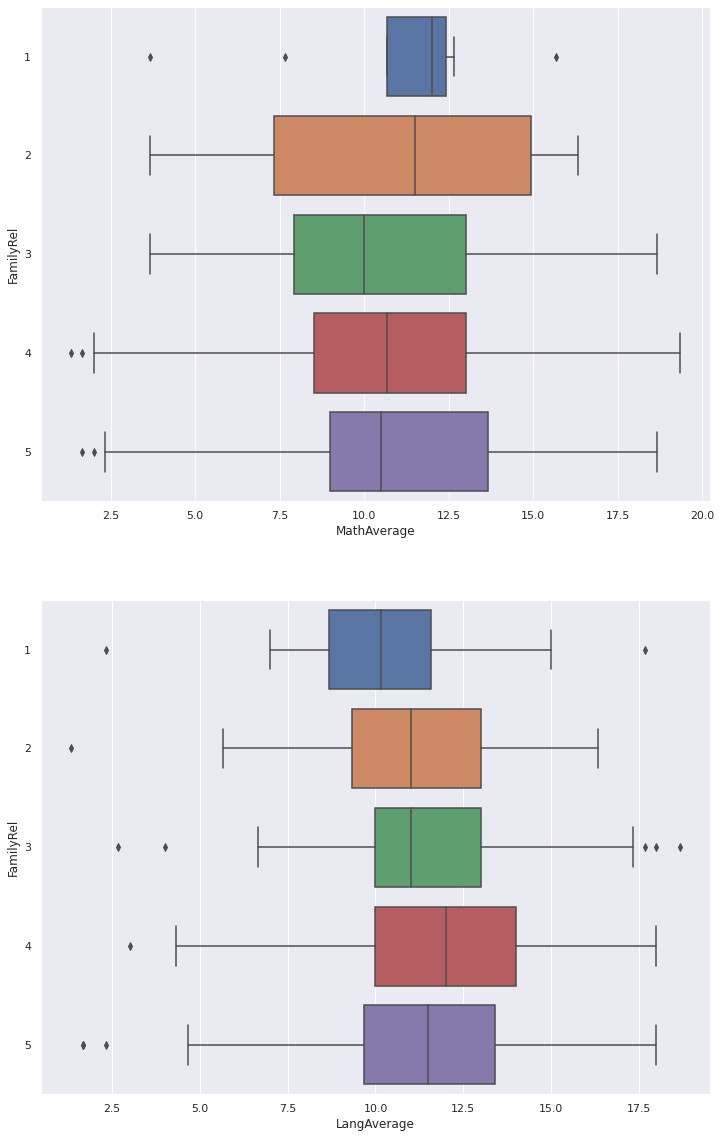

In [36]:
# Boxplots for both math and language 

f, axes = plt.subplots(2, 1, figsize = (12,20))
sb.boxplot(x = 'MathAverage', y = 'FamilyRel', data = FRmarks_math, orient = 'h', ax = axes[0])
sb.boxplot(x = 'LangAverage', y = 'FamilyRel', data = FRmarks_lang, orient = 'h', ax = axes[1])

For `math performance`, it seems like we can ignore FamilyRel = 1 because it has relatively fewer datapoints compared to the other categories. It seems like FamilyRel = 4 and 5 have a bigger spread of data compared to 2 and 3 but it could be due to the difference in the number of datapoints.   

But it seems like the students' performance are roughly the same for all the categories.

For `language performance`, it is similar to math performance - the performance are roughly the same for all the categories.    
FamilyRel = 4 seem to produce better performing students because its median and 3rd quartile are higher than other categories.

In [37]:
# Print only the mean value for each category
arr = [1,2,3,4,5]

for i in arr:
    if i!=1:
        print(f"Math mean for FamilyRel({i}):", 
              FRmarks_math[FRmarks_math.FamilyRel == i].MathAverage.mean().round(2))
        print()

for i in arr:
    print(f"Language mean for FamilyRel({i}):", 
          FRmarks_lang[FRmarks_lang.FamilyRel == i].LangAverage.mean().round(2))
    print()

Math mean for FamilyRel(2): 10.78

Math mean for FamilyRel(3): 10.39

Math mean for FamilyRel(4): 10.66

Math mean for FamilyRel(5): 10.86

Language mean for FamilyRel(1): 10.44

Language mean for FamilyRel(2): 10.78

Language mean for FamilyRel(3): 11.31

Language mean for FamilyRel(4): 11.99

Language mean for FamilyRel(5): 11.43



Based on the mean, **family relationship after 2** had a `positive influence` on a student's math performance. Overall it is still an improvement in performance because FamilyRel(2) < FamilyRel(5) but I will conclude only to a limited extent because of the sharp drop from FamilyRel(2) to FamilyRel(3).


**Family relationship other than 5** had a `positive influence` on a student's language performance. Overall, it is still an improvement in performance because FamilyRel(1) < FamilyRel(5).

After examining both mean and boxplot...

I conclude that family relationship does **positively influence** a student's language performance but as for math performance, it is a positive influence only to a `limited extent`.

# Family Support VS Student's Performance

In [38]:
FS_math = pd.DataFrame(performance_math.FamilySup)
FS_lang = pd.DataFrame(performance_lang.FamilySup)

FSmarks_math = pd.concat([FS_math, average_math], axis = 1)
FSmarks_lang = pd.concat([FS_lang, average_lang], axis = 1)

In [39]:
# A look at the family support value counts for both subjects

df = pd.concat([pd.DataFrame(FS_math.value_counts()), pd.DataFrame(FS_lang.value_counts())], axis = 1)
df

,0,0
FamilySup,,
Yes,242,398
No,153,251


<AxesSubplot:xlabel='LangAverage', ylabel='FamilySup'>

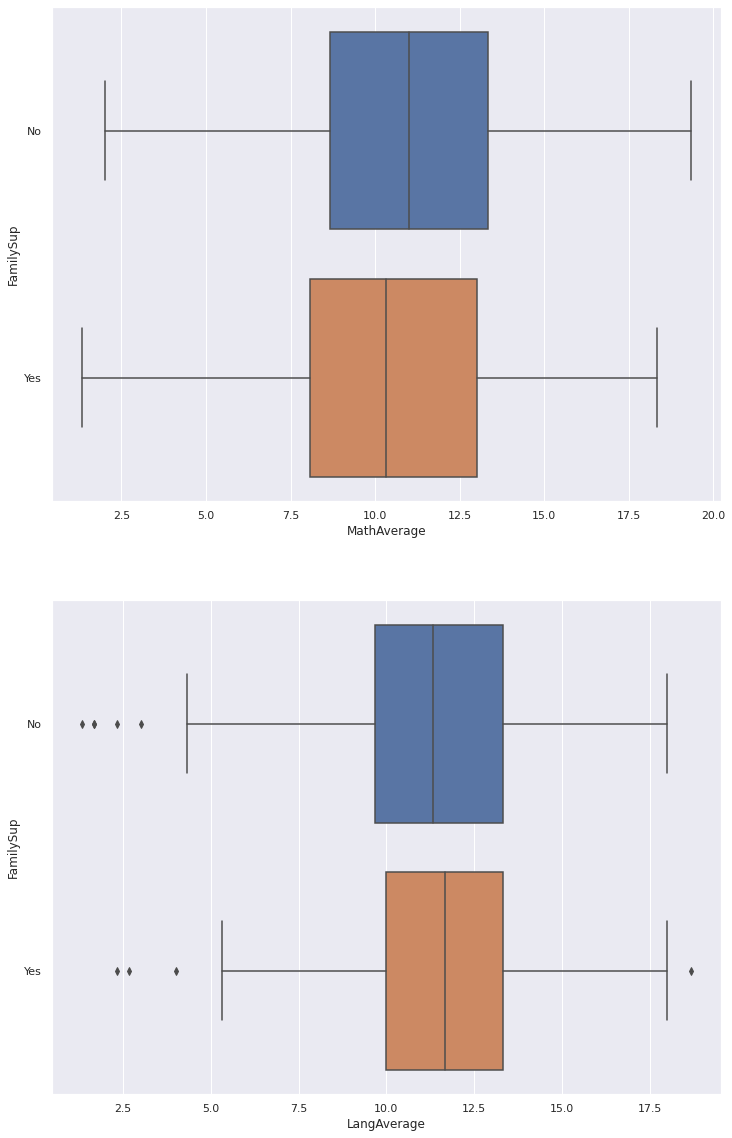

In [40]:
# Boxplots for both math and language 

f, axes = plt.subplots(2, 1, figsize = (12,20))
sb.boxplot(x = 'MathAverage', y = 'FamilySup', data = FSmarks_math, orient = 'h', ax = axes[0])
sb.boxplot(x = 'LangAverage', y = 'FamilySup', data = FSmarks_lang, orient = 'h', ax = axes[1])

In [41]:
# We look at the actual data to compare the quartiles and median for language because boxplots look too similar

df = pd.concat([FSmarks_math[FSmarks_math.FamilySup == 'Yes'].describe().rename(columns={'MathAverage': 'MathAverage_Yes'}),
                FSmarks_math[FSmarks_math.FamilySup == 'No'].describe().rename(columns={'MathAverage': 'MathAverage_No'}),
                FSmarks_lang[FSmarks_lang.FamilySup == 'Yes'].describe().rename(columns={'LangAverage': 'LangAverage_Yes'}), 
                FSmarks_lang[FSmarks_lang.FamilySup == 'No'].describe().rename(columns={'LangAverage': 'LangAverage_No'})],
               axis = 1)
df

,MathAverage_Yes,MathAverage_No,LangAverage_Yes,LangAverage_No
count,242.000000,153.000000,398.000000,251.000000
mean,10.498623,10.965142,11.732831,11.454183
std,3.659965,3.748521,2.700319,3.030072
min,1.333333,2.000000,2.333333,1.333333
25%,8.083333,8.666667,10.000000,9.666667
50%,10.333333,11.000000,11.666667,11.333333
75%,13.000000,13.333333,13.333333,13.333333
max,18.333333,19.333333,18.666667,18.000000


**Math**: Mean, 1st Quartile, Median and 3rd Quartile for students without family support is higher than sudents with family support.       
This suggest that students without family support performed better in math.

**Lang**: Mean, 1st Quartile and Median for students with family support is higher than students without.      
This suggest that students with family support performed better in language.

Putting the conclusions together.. (Does the **family background**, **family relationship** and **family support** influence a student's **performance**?)

**1) FAMILY BACKGROUND**       
Within family background, the more influential factors are `family education background` the `parents' occupation`.      
- Students tend to perform better when their family education background is better. 
- Students tend to perform better when their parents are **teachers** or they work in the **healthcare sector**. 

The `type of residence` they live in does play a part in their performance as well but only to a **small extent** compared to the other factors.


**2) FAMILY RELATIONSHIP**        
Family relationship does **positively influence** a student's language performance but as for math performance, it is a positive influence only to a `limited extent`.


**3) FAMILY SUPPORT**       
Students **without family support** `performed better in math` while students **with family support** `performed better in language`.

`QUESTION 2`: What can a student do (attributes that they can control) to improve their performance in these subjects?

Let's look at the variables that a student can control...  

- Study Time: Weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)   
- Activities: Extra-curricular activities (binary: yes or no)
- Romantic: In a romantic relationship (binary: yes or no)    
- Going Out: Going out with friends (numeric: from 1 - very low to 5 - very high)  

Let's do an analysis for all 4 variables. First we see that all the variables are categorical.        

In [42]:
# Extract all the relevant columns
studytime_math = pd.DataFrame(performance_math.StudyTime).rename(columns = {'StudyTime': 'StudyTime_Math'})
activities_math = pd.DataFrame(performance_math.Activities).rename(columns = {'Activities': 'Activities_Math'})
romantic_math = pd.DataFrame(performance_math.Romantic).rename(columns = {'Romantic': 'Romantic_Math'})
goingout_math = pd.DataFrame(performance_math.GoingOut).rename(columns = {'GoingOut': 'GoingOut_Math'})

studytime_lang = pd.DataFrame(performance_lang.StudyTime).rename(columns = {'StudyTime': 'StudyTime_Lang'})
activities_lang = pd.DataFrame(performance_lang.Activities).rename(columns = {'Activities': 'Activities_Lang'})
romantic_lang = pd.DataFrame(performance_lang.Romantic).rename(columns = {'Romantic': 'Romantic_Lang'})
goingout_lang = pd.DataFrame(performance_lang.GoingOut).rename(columns = {'GoingOut': 'GoingOut_Lang'})

In [43]:
# To create a function to show value counts as well as boxplots

def boxplots(y1, y2, df):
    valuecounts = pd.DataFrame(pd.concat([pd.DataFrame(df[y1].value_counts()), pd.DataFrame(df[y2].value_counts())], axis = 1))
    print("VALUE COUNTS")
    print(valuecounts)
    f, axes = plt.subplots(2,1,figsize = (12,10))
    sb.boxplot(x = 'MathAverage', y = y1, data = df, orient = 'h', ax = axes[0])
    sb.boxplot(x = 'LangAverage', y = y2, data = df, orient = 'h', ax = axes[1])

**`Study Time VS Student's Performance`**

VALUE COUNTS
     StudyTime_Math  StudyTime_Lang
2.0             198             305
1.0             105             212
3.0              65              97
4.0              27              35


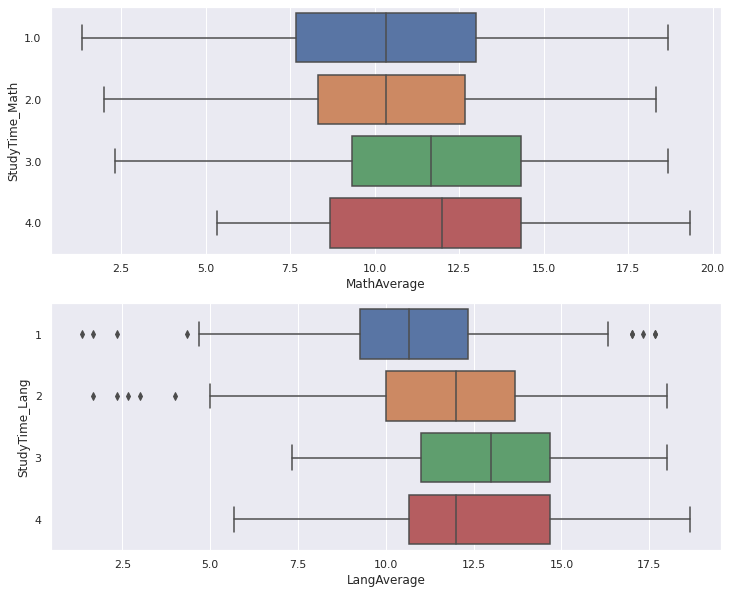

In [44]:
df = pd.concat([average_math, average_lang, studytime_math, studytime_lang], axis = 1)
boxplots('StudyTime_Math', 'StudyTime_Lang', df)

In general, we see majority of the datapoints **moving to the right** as a student spend more time studying for both subjects. This implies a student perform **better** when they spend more time studying.

However, we see that for categories 3 and 4, the boxplots are **quite similar** for both subjects.   
This suggest that so long as students who are in categories 1 and 2 **move up** to at least category 3, they should see an improvement in their performance be it math or language.

**`Activities VS Student's Performance`**

VALUE COUNTS
     Activities_Math  Activities_Lang
Yes              201              315
No               194              334


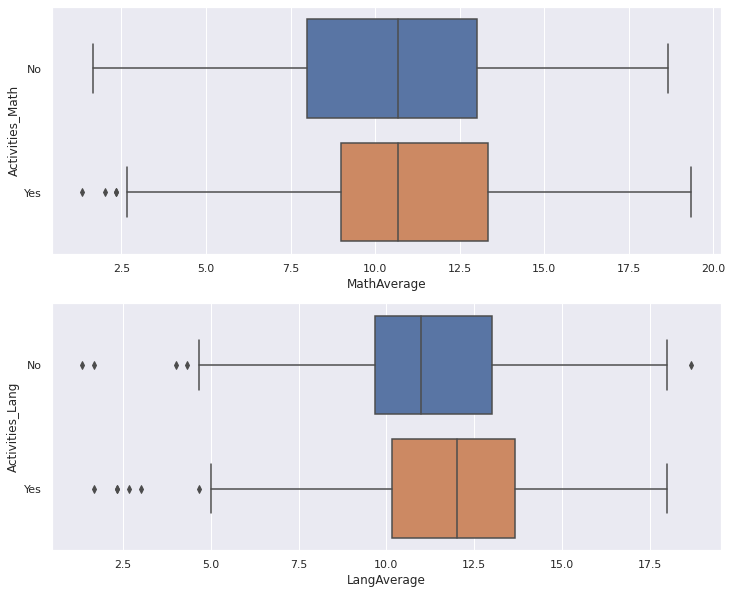

In [45]:
df = pd.concat([average_math, average_lang, activities_math, activities_lang], axis = 1)

boxplots('Activities_Math', 'Activities_Lang', df)

In [46]:
# Boxplots look similar, it will be better to see the specific values for the quartiles, mean and median
# Using describe allows us to see the individual quartiles, mean and median.

print("Math Summary stats for students with activities:\n", df[df.Activities_Math == 'Yes'].MathAverage.describe(), '\n')
print("Math Summary stats for students without activities:\n", df[df.Activities_Math == 'No'].MathAverage.describe(), '\n')
print("Language Summary stats for students with activities:\n", df[df.Activities_Lang == 'Yes'].LangAverage.describe(), '\n')
print("Language Summary stats for students without activities:\n", df[df.Activities_Lang == 'No'].LangAverage.describe())

Math Summary stats for students with activities:
 count    201.000000
mean      10.827529
std        3.672888
min        1.333333
25%        9.000000
50%       10.666667
75%       13.333333
max       19.333333
Name: MathAverage, dtype: float64 

Math Summary stats for students without activities:
 count    194.000000
mean      10.525773
std        3.724643
min        1.666667
25%        8.000000
50%       10.666667
75%       13.000000
max       18.666667
Name: MathAverage, dtype: float64 

Language Summary stats for students with activities:
 count    315.000000
mean      11.833862
std        2.826847
min        1.666667
25%       10.166667
50%       12.000000
75%       13.666667
max       18.000000
Name: LangAverage, dtype: float64 

Language Summary stats for students without activities:
 count    334.000000
mean      11.428144
std        2.829605
min        1.333333
25%        9.666667
50%       11.000000
75%       13.000000
max       18.666667
Name: LangAverage, dtype: float64


**Math**: Mean, 1st Quartile and 3rd Quartile is higher for students with activities. This suggest that students who joined activities tend to do better in math.

**Lang**: Mean, 1st Quartile, Median and 3rd Quartile is higher for students with activities. This suggest that students who joined activites do better in language.

In conclusion, participating in activities can help improve a student's performance.

**`Romantic VS Student's Performance`**

VALUE COUNTS
     Romantic_Math  Romantic_Lang
No             263            410
Yes            132            239


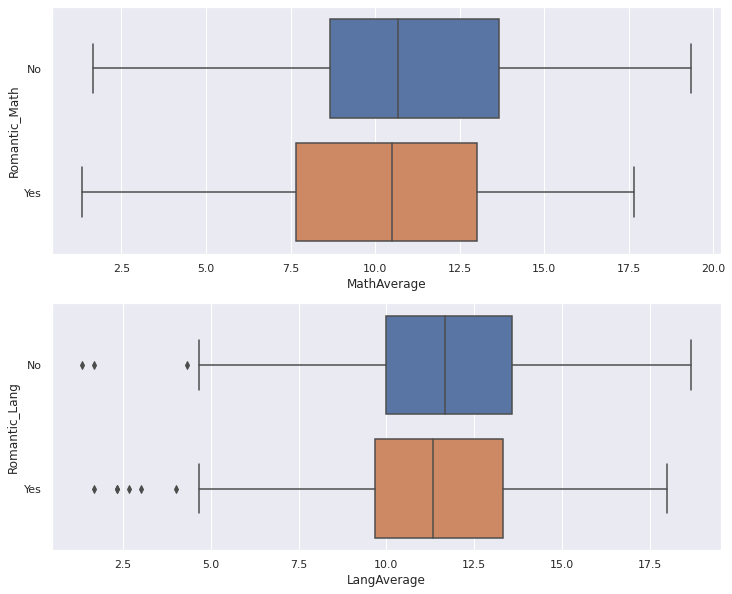

In [47]:
df = pd.concat([average_math, average_lang, romantic_math, romantic_lang], axis = 1)

boxplots('Romantic_Math', 'Romantic_Lang', df)

In [48]:
# To print the mean marks for each subjects for students who are in romantic relationship or not.

print('Math Average for students in romantic relationship:',
      df[df.Romantic_Math == 'Yes'].MathAverage.mean().round(2))
print('Math Average for students NOT in romantic relationship:',
      df[df.Romantic_Math == 'No'].MathAverage.mean().round(2))
print('Language Average for students in romantic relationship:',
      df[df.Romantic_Lang == 'Yes'].LangAverage.mean().round(2))
print('Language Average for students NOT in romantic relationship:',
      df[df.Romantic_Lang == 'No'].LangAverage.mean().round(2))

Math Average for students in romantic relationship: 10.14
Math Average for students NOT in romantic relationship: 10.95
Language Average for students in romantic relationship: 11.28
Language Average for students NOT in romantic relationship: 11.82


**Math**: Mean, 1st Quartile, Median and 3rd Quartile are higher for students without romantic relationship.

**Lang**: Mean, 1st Quartile, Median and 3rd Quartile are higher for students without romantic relationship.

Hence, students without romantic relationship tend to `do better` than students with romantic relationship. 

**`Going Out VS Student's Performance`**

VALUE COUNTS
     GoingOut_Math  GoingOut_Lang
3.0            130            205
2.0            103            145
4.0             86            141
5.0             53            110
1.0             23             48


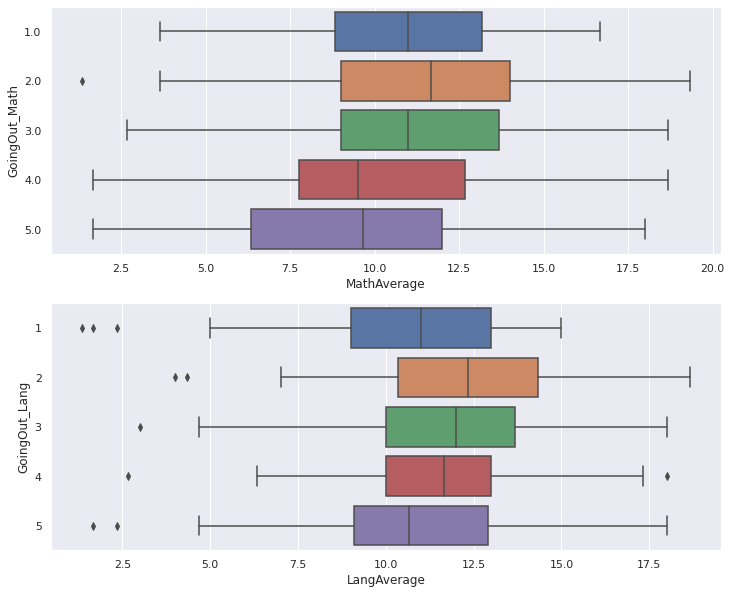

In [49]:
df = pd.concat([average_math, average_lang, goingout_math, goingout_lang], axis = 1)

boxplots('GoingOut_Math', 'GoingOut_Lang', df)

In [50]:
arr = [1,2,3,4,5]

for i in arr:
    print(f"Math Average for going out index({i})", df[df.GoingOut_Math == i].MathAverage.mean().round(2))
print()
for i in arr:
    print(f"Language Average for going out index({i})", df[df.GoingOut_Lang == i].LangAverage.mean().round(2))

Math Average for going out index(1) 10.59
Math Average for going out index(2) 11.34
Math Average for going out index(3) 11.1
Math Average for going out index(4) 10.05
Math Average for going out index(5) 9.43

Language Average for going out index(1) 10.53
Language Average for going out index(2) 12.34
Language Average for going out index(3) 11.84
Language Average for going out index(4) 11.58
Language Average for going out index(5) 10.81


Starting from category 2, as a student **go out more**, the majority of the datapoints (indicated by the box) start **shifting to the left** which imply `deterioration of performance`. 

Category 2 generally has a **highest Mean results, 1st Quartile, Median, 3rd Quartile in both subjects**. This suggest that students in category 2 tend to `perform better` than other students.

Hence, we see that how much a student go out actually influence their performance.   
Perhaps category 2 is a **`healthy going out index`** where you get to enjoy going out and also perform better in school.   
As such, students who are in category 1 should move up to category 2 and students who are in categories 3,4 and 5 should move down to 2.

What can a student do (attributes that they can control) to improve their performance in these subjects?

**1) Study Time**
So long as students who are in categories 1 and 2 **move up** to at least category 3, they should see an improvement in their performance for both subjects.

**2) Activities**
Participating in activities can help improve a student's performance for both subjects.

**3) Romantic**
Students without romantic relationship tend to `do better` than students with romantic relationship. For students in a romantic relationship, perhaps they can end their relationship to improve their performance for both subjects. (cruel fact :( )

**4) Going Out**
Students who are in category 1 should move up to category 2 and students who are in categories 3,4 and 5 should move down to 2 if they want to improve their performance for both subjects.

`QUESTION 3` What can schools do (attributes that they can control) to help students perform better in these subjects?

Look at the variables that school can control:
- SchoolSup: Extra educational support (binary: yes or no)  
- Activities: Extra-curricular activities (binary: yes or no)

These are categorical variables.

In [51]:
# Rename T1, T2 and T3 into their respective subjects
performance_math = performance_math.rename(columns = {"T1": "T1_Math", "T2": "T2_Math", "T3": "T3_Math"})
performance_lang = performance_lang.rename(columns = {"T1": "T1_Lang", "T2": "T2_Lang", "T3": "T3_Lang"})

# Create schoolA dataframe
schoolA_math = pd.DataFrame(performance_math[performance_math['School'] == 'SchoolA'])
schoolA_lang = pd.DataFrame(performance_lang[performance_lang['School'] == 'SchoolA'])
schoolA = schoolA_math.append(schoolA_lang).drop(columns = "FamilyEduBG")

# Create schoolB dataframe
schoolB_math = pd.DataFrame(performance_math[performance_math['School'] == 'SchoolB'])
schoolB_lang = pd.DataFrame(performance_lang[performance_lang['School'] == 'SchoolB'])
schoolB = schoolB_math.append(schoolB_lang).drop(columns = ["FamilyEduBG"])

# Metrics for student performance
schoolAT1toT3_math = pd.concat([schoolA.T1_Math, schoolA.T2_Math, schoolA.T3_Math], axis = 1)
schoolAT1toT3_lang = pd.concat([schoolA.T1_Lang, schoolA.T2_Lang, schoolA.T3_Lang], axis = 1)
schoolBT1toT3_math = pd.concat([schoolB.T1_Math, schoolB.T2_Math, schoolB.T3_Math], axis = 1)
schoolBT1toT3_lang = pd.concat([schoolB.T1_Lang, schoolB.T2_Lang, schoolB.T3_Lang], axis = 1)
schoolA['MathAverage'] = (schoolA.T1_Math + schoolA.T2_Math + schoolA.T3_Math)/3
schoolA['LangAverage'] = (schoolA.T1_Lang + schoolA.T2_Lang + schoolA.T3_Lang)/3
schoolB['MathAverage'] = (schoolB.T1_Math + schoolB.T2_Math + schoolB.T3_Math)/3
schoolB['LangAverage'] = (schoolB.T1_Lang + schoolB.T2_Lang + schoolB.T3_Lang)/3

# Renaming schoolsup according to their respective schools so that the boxplot will be clearer
schoolA_schoolsup = pd.DataFrame(schoolA.SchoolSup).rename(columns={'SchoolSup': 'SchoolSup_A'})
schoolB_schoolsup = pd.DataFrame(schoolB.SchoolSup).rename(columns={'SchoolSup': 'SchoolSup_B'})

# Below is the dataframe for schoolsup, math and language according to their respective schools
schoolA_schoolsup_mathlang = pd.concat([schoolA_schoolsup, schoolAT1toT3_math, schoolAT1toT3_lang, 
                                        schoolA['MathAverage'], schoolA['LangAverage']], axis = 1)
schoolB_schoolsup_mathlang = pd.concat([schoolB_schoolsup, schoolBT1toT3_math, schoolBT1toT3_lang, 
                                        schoolB['MathAverage'], schoolB['LangAverage']], axis = 1)

In [52]:
schoolA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 772 entries, 0 to 422
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   School       772 non-null    object 
 1   Gender       772 non-null    object 
 2   Age          772 non-null    int64  
 3   Residence    772 non-null    object 
 4   MomEdu       772 non-null    int64  
 5   DadEdu       772 non-null    int64  
 6   MomJob       772 non-null    object 
 7   DadJob       772 non-null    object 
 8   TravelTime   772 non-null    int64  
 9   StudyTime    772 non-null    int64  
 10  PastFails    772 non-null    int64  
 11  SchoolSup    772 non-null    object 
 12  FamilySup    772 non-null    object 
 13  PaidSup      772 non-null    object 
 14  Activities   772 non-null    object 
 15  Internet     772 non-null    object 
 16  Romantic     772 non-null    object 
 17  FamilyRel    772 non-null    int64  
 18  FreeTime     772 non-null    int64  
 19  GoingOut

**`School Support VS Student's Performance`**

SchoolSup: Extra educational support (binary: yes or no)

Effectiveness of school support depends on the student's performance over time. So instead of taking average performance, we should compare the grades from term 1 to term 3.

In [53]:
# Breaking down the dataframe into respective subjects by dropping the NaN values
schoolA_schoolsup_math = schoolA_schoolsup_mathlang[schoolA_schoolsup_mathlang['MathAverage'].notna()]
schoolA_schoolsup_lang = schoolA_schoolsup_mathlang[schoolA_schoolsup_mathlang['LangAverage'].notna()]
schoolB_schoolsup_math = schoolB_schoolsup_mathlang[schoolB_schoolsup_mathlang['MathAverage'].notna()]
schoolB_schoolsup_lang = schoolB_schoolsup_mathlang[schoolB_schoolsup_mathlang['LangAverage'].notna()]

In [54]:
schoolA_withschoolsup_math = schoolA_schoolsup_math[schoolA_schoolsup_math['SchoolSup_A'] == 'Yes']
schoolA_withoutschoolsup_math = schoolA_schoolsup_math[schoolA_schoolsup_math['SchoolSup_A'] == 'No']
schoolA_withschoolsup_lang = schoolA_schoolsup_lang[schoolA_schoolsup_lang['SchoolSup_A'] == 'Yes']
schoolA_withoutschoolsup_lang = schoolA_schoolsup_lang[schoolA_schoolsup_lang['SchoolSup_A'] == 'No']

[Text(0.5, 0, 'Without School Support')]

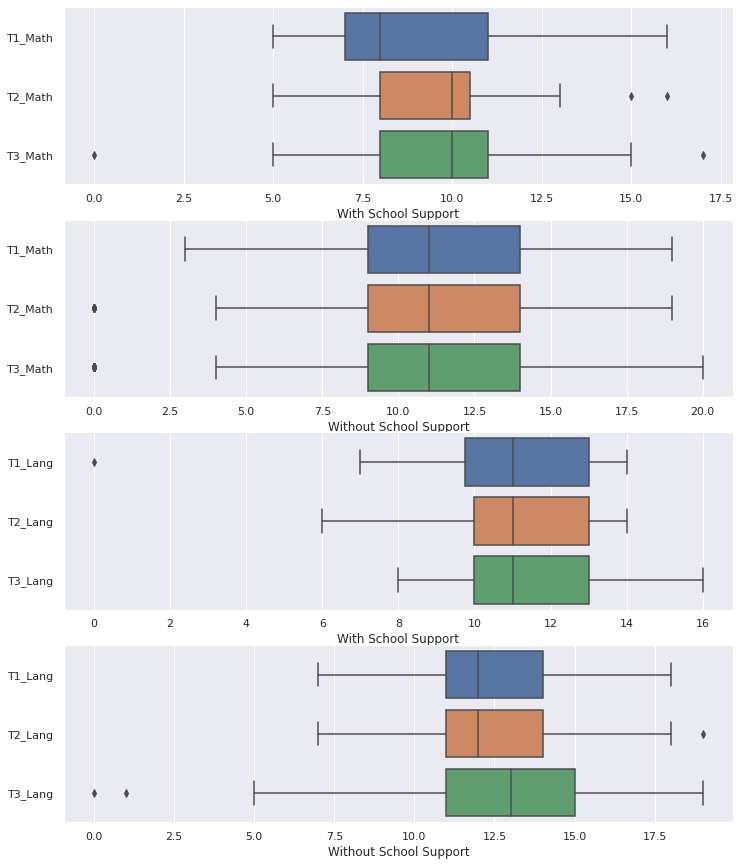

In [55]:
f,axes = plt.subplots(4,1,figsize = (12,15))

sb.boxplot(data = schoolA_withschoolsup_math[['T1_Math', 'T2_Math', 'T3_Math']], orient = 'h',
          ax = axes[0]).set(xlabel = 'With School Support')
sb.boxplot(data = schoolA_withoutschoolsup_math[['T1_Math', 'T2_Math', 'T3_Math']], orient = 'h',
          ax = axes[1]).set(xlabel = 'Without School Support')
sb.boxplot(data = schoolA_withschoolsup_lang[['T1_Lang', 'T2_Lang', 'T3_Lang']], orient = 'h',
          ax = axes[2]).set(xlabel = 'With School Support')
sb.boxplot(data = schoolA_withoutschoolsup_lang[['T1_Lang', 'T2_Lang', 'T3_Lang']], orient = 'h',
          ax = axes[3]).set(xlabel = 'Without School Support')


In [56]:
# To see the individual term mean marks, with school support or not.
print("--MATH--")
print("With school support, T1 math average:", schoolA_withschoolsup_math.T1_Math.mean().round(2))
print("With school support, T2 math average:",schoolA_withschoolsup_math.T2_Math.mean().round(2))
print("With school support, T3 math average:",schoolA_withschoolsup_math.T3_Math.mean().round(2))
print()
print("Without school support, T1 math average:", schoolA_withoutschoolsup_math.T1_Math.mean().round(2))
print("Without school support, T2 math average:",schoolA_withoutschoolsup_math.T2_Math.mean().round(2))
print("Without school support, T3 math average:",schoolA_withoutschoolsup_math.T3_Math.mean().round(2))
print()

print("--LANG--")
print("With school support, T1 lang average:", schoolA_withschoolsup_lang.T1_Lang.mean().round(2))
print("With school support, T2 lang average:",schoolA_withschoolsup_lang.T2_Lang.mean().round(2))
print("With school support, T3 lang average:",schoolA_withschoolsup_lang.T3_Lang.mean().round(2))
print()
print("Without school support, T1 lang average:", schoolA_withoutschoolsup_lang.T1_Lang.mean().round(2))
print("Without school support, T2 lang average:",schoolA_withoutschoolsup_lang.T2_Lang.mean().round(2))
print("Without school support, T3 lang average:",schoolA_withoutschoolsup_lang.T3_Lang.mean().round(2))

--MATH--
With school support, T1 math average: 9.08
With school support, T2 math average: 9.57
With school support, T3 math average: 9.43

Without school support, T1 math average: 11.26
Without school support, T2 math average: 10.99
Without school support, T3 math average: 10.67

--LANG--
With school support, T1 lang average: 10.75
With school support, T2 lang average: 11.12
With school support, T3 lang average: 11.39

Without school support, T1 lang average: 12.17
Without school support, T2 lang average: 12.3
Without school support, T3 lang average: 12.76


**SCHOOL A** (What can schools do (attributes that they can control) to help students perform better in these subjects?)

**Math**: The median for students with school support increased over time. The mean also improved after T1. The 1st quartile for T2 and T3 were also higher than T1. These suggest improvement in performance for majority of the students with school support. More specifically, it suggest improvement for weaker students who used to be in the 1st quartile.


Whereas the median for students without school support remained roughly the same. In fact, the box stays roughly the same which suggest that there were no changes to the performance for majority of the students. However we see decrease in mean marks over time which suggest `deterioration` of performance.

**Lang**: We do not see significant changes in the box for students with school support. But the mean increased over time which is an indicator that students are performing better over time.

But we do see a significant increase in median and 3rd Quartile for students without school support.

Overall, school A can consider providing school support to more weak students to help improve their `math` performance. But as for `language`, it can remain optional because students without school support are performing better.

In [57]:
schoolB_withschoolsup_math = schoolB_schoolsup_math[schoolB_schoolsup_math['SchoolSup_B'] == 'Yes']
schoolB_withoutschoolsup_math = schoolB_schoolsup_math[schoolB_schoolsup_math['SchoolSup_B'] == 'No']
schoolB_withschoolsup_lang = schoolB_schoolsup_lang[schoolB_schoolsup_lang['SchoolSup_B'] == 'Yes']
schoolB_withoutschoolsup_lang = schoolB_schoolsup_lang[schoolB_schoolsup_lang['SchoolSup_B'] == 'No']

[Text(0.5, 0, 'Without School Support')]

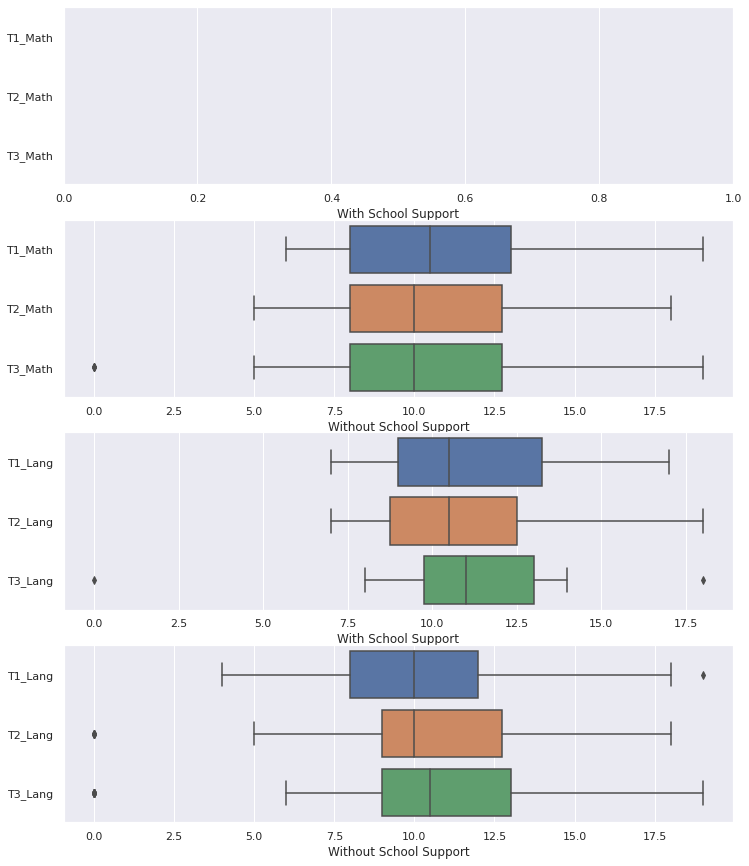

In [58]:
f,axes = plt.subplots(4,1,figsize = (12,15))

sb.boxplot(data = schoolB_withschoolsup_math[['T1_Math', 'T2_Math', 'T3_Math']], orient = 'h',
          ax = axes[0]).set(xlabel = 'With School Support')
sb.boxplot(data = schoolB_withoutschoolsup_math[['T1_Math', 'T2_Math', 'T3_Math']], orient = 'h',
          ax = axes[1]).set(xlabel = 'Without School Support')
sb.boxplot(data = schoolB_withschoolsup_lang[['T1_Lang', 'T2_Lang', 'T3_Lang']], orient = 'h',
          ax = axes[2]).set(xlabel = 'With School Support')
sb.boxplot(data = schoolB_withoutschoolsup_lang[['T1_Lang', 'T2_Lang', 'T3_Lang']], orient = 'h',
          ax = axes[3]).set(xlabel = 'Without School Support')


In [59]:
print("--MATH--")
print("With school support, T1 math average: 0.00")
print("With school support, T2 math average: 0.00")
print("With school support, T3 math average: 0.00")
print()
print("Without school support, T1 math average:", schoolB_withoutschoolsup_math.T1_Math.mean().round(2))
print("Without school support, T2 math average:",schoolB_withoutschoolsup_math.T2_Math.mean().round(2))
print("Without school support, T3 math average:",schoolB_withoutschoolsup_math.T3_Math.mean().round(2))
print()

print("--LANG--")
print("With school support, T1 lang average:", schoolB_withschoolsup_lang.T1_Lang.mean().round(2))
print("With school support, T2 lang average:",schoolB_withschoolsup_lang.T2_Lang.mean().round(2))
print("With school support, T3 lang average:",schoolB_withschoolsup_lang.T3_Lang.mean().round(2))
print()
print("Without school support, T1 lang average:", schoolB_withoutschoolsup_lang.T1_Lang.mean().round(2))
print("Without school support, T2 lang average:",schoolB_withoutschoolsup_lang.T2_Lang.mean().round(2))
print("Without school support, T3 lang average:",schoolB_withoutschoolsup_lang.T3_Lang.mean().round(2))

--MATH--
With school support, T1 math average: 0.00
With school support, T2 math average: 0.00
With school support, T3 math average: 0.00

Without school support, T1 math average: 10.67
Without school support, T2 math average: 10.2
Without school support, T3 math average: 9.85

--LANG--
With school support, T1 lang average: 11.17
With school support, T2 lang average: 10.92
With school support, T3 lang average: 10.75

Without school support, T1 lang average: 10.25
Without school support, T2 lang average: 10.47
Without school support, T3 lang average: 10.64


**SCHOOL B** (What can schools do (attributes that they can control) to help students perform better in these subjects?)

**Math**: School B did not have any students with school support. However, we see that the **mean marks are decreasing** which suggest `deterioration of performance`. Perhaps the school can provide some support and see if there are any changes.

**Lang**: The **1st Quartile and Median of T1 is lower than T3** which suggest `improvement` but the **3rd Quartile of T1 is higher than T3** which suggest students `did better in T1 than T3`. And by looking at how the **mean marks decreased** over time, we can conclude that students with school support `are not improving over time`. 

For students without school support, we see that the **Mean, 1st Quartile, Median, 3rd Quartile are increasing** over time which suggest `improvement in performance`.

Hence for school B, it is `unsure` whether providing school support can help improve one's math performance because there is no data. But the students are `not improving`, so perhaps they can consider providing school support and see if it is  effective.    
As for language, school support is **ineffective**. As such, it can remain optional and schools should look for other ways to improve one's language performance.

**`Activities VS Student's Performance`**

This was previously under attributes a student can control. But perhaps we can see it in a school's perspective.

In [60]:
schoolA_activities_mathlang = schoolA[['Activities', 'MathAverage', 'LangAverage']]
schoolB_activities_mathlang = schoolB[['Activities', 'MathAverage', 'LangAverage']]

<AxesSubplot:xlabel='LangAverage', ylabel='Activities'>

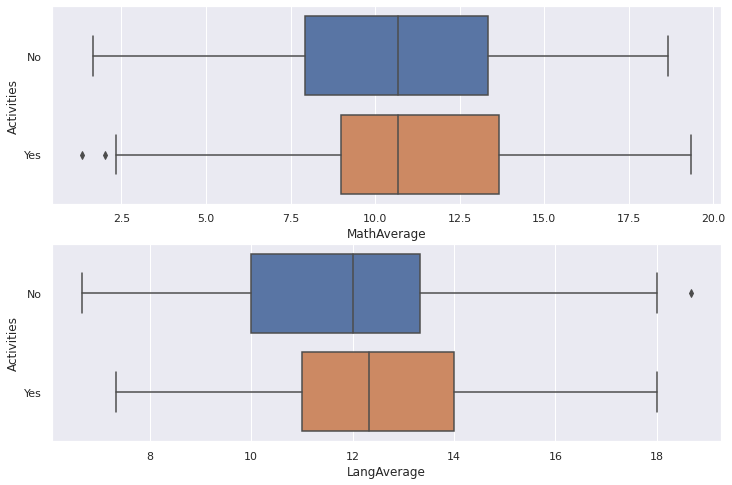

In [61]:
f, axes = plt.subplots(2,1,figsize = (12,8))

sb.boxplot(x = 'MathAverage', y = 'Activities', data = schoolA_activities_mathlang, ax = axes[0], orient = 'h')
sb.boxplot(x = 'LangAverage', y = 'Activities', data = schoolA_activities_mathlang, ax = axes[1], orient = 'h')

**SCHOOL A** (What can schools do (attributes that they can control) to help students perform better in these subjects?)

**Math**: Students who joined activities had a higher 1st and 3rd quartile compared to students who did not. This suggest that students who joined activities performed slightly better.

**Lang**: Students who joined activities had a much higher 1st and 3rd quartile compared to students who did not. This suggest that students who joined activities performed better.

As such, **school A should encourage more students to join activities**.

<AxesSubplot:xlabel='LangAverage', ylabel='Activities'>

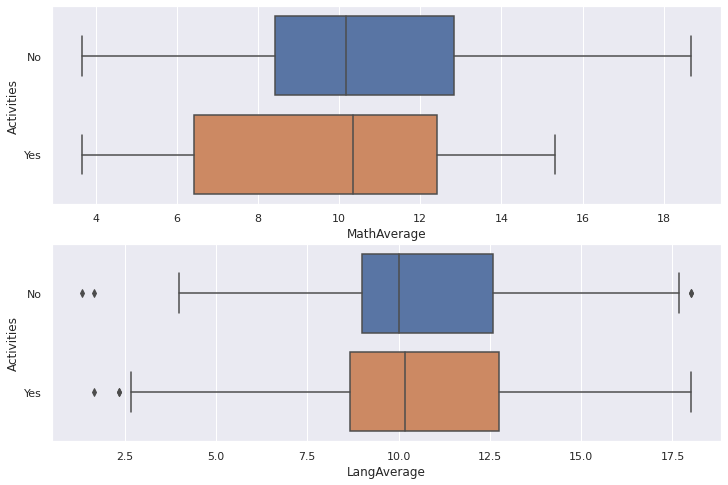

In [62]:
f, axes = plt.subplots(2,1,figsize = (12,8))
sb.boxplot(x = 'MathAverage', y = 'Activities', data = schoolB_activities_mathlang, ax = axes[0], orient = 'h')
sb.boxplot(x = 'LangAverage', y = 'Activities', data = schoolB_activities_mathlang, ax = axes[1], orient = 'h')

**SCHOOL B** (What can schools do (attributes that they can control) to help students perform better in these subjects?)

**Math**: Students who joined activities had a much lower 1st quartile and a slightly lower 3rd quartile than students who did not. This suggest that students who joined activities performed worse.

**Lang**: The boxplots look quite similar to each other which suggest that activities do not affect one's performance much.

Hence, school B should try to **discourage students from joining activities if they want to do better in math**
but for language, it can remain optional to them. 

`QUESTION 4`: Which school has a better overall student performance in these two subjects? Why do you think that is?

Split the data into schools and into individual subjects.

In [63]:
# Create dataframes according to school A and school B
schoolA_math = pd.DataFrame(performance_math[performance_math['School'] == 'SchoolA'])
schoolA_lang = pd.DataFrame(performance_lang[performance_lang['School'] == 'SchoolA'])
schoolA = schoolA_math.append(schoolA_lang).drop(columns = "FamilyEduBG")

schoolB_math = pd.DataFrame(performance_math[performance_math['School'] == 'SchoolB'])
schoolB_lang = pd.DataFrame(performance_lang[performance_lang['School'] == 'SchoolB'])
schoolB = schoolB_math.append(schoolB_lang).drop(columns = ["FamilyEduBG"])

In [64]:
schoolA_math = schoolA[['T1_Math', 'T2_Math', 'T3_Math']]
schoolB_math = schoolB[['T1_Math', 'T2_Math', 'T3_Math']]
schoolA_lang = schoolA[['T1_Lang', 'T2_Lang', 'T3_Lang']]
schoolB_lang = schoolB[['T1_Lang', 'T2_Lang', 'T3_Lang']]

In [65]:
# Drop the NaN values
schoolA_math = schoolA_math.dropna()
schoolB_math = schoolB_math.dropna()

schoolA_lang = schoolA_lang.dropna()
schoolB_lang = schoolB_lang.dropna()

In [66]:
# Create a column to calculate the average grades from T1 to T3
schoolA_math['AverageA_Math'] = (schoolA_math.T1_Math + schoolA_math.T2_Math + schoolA_math.T3_Math)/3
schoolA_lang['AverageA_Lang'] = (schoolA_lang.T1_Lang + schoolA_lang.T2_Lang + schoolA_lang.T3_Lang)/3
schoolB_math['AverageB_Math'] = (schoolB_math.T1_Math + schoolB_math.T2_Math + schoolB_math.T3_Math)/3
schoolB_lang['AverageB_Lang'] = (schoolB_lang.T1_Lang + schoolB_lang.T2_Lang + schoolB_lang.T3_Lang)/3

Mean for School A: 10.74
Mean for School B: 10.24


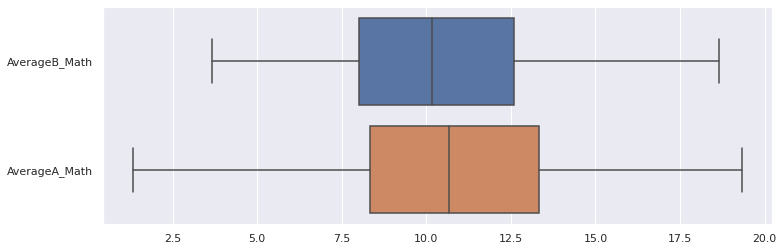

In [67]:
# Conduct analysis based on boxlplots. We first start with MATH.
df = pd.concat([pd.DataFrame(schoolB_math.AverageB_Math), pd.DataFrame(schoolA_math.AverageA_Math)])
f = plt.figure(figsize = (12,4))

sb.boxplot(data = df, orient = 'h')

print("Mean for School A:", schoolA_math.AverageA_Math.mean(axis = 0).round(2))
print("Mean for School B:", schoolB_math.AverageB_Math.mean(axis = 0).round(2))

Which school has a better overall student performance in these two subjects? Why do you think that is?

Based on the `mean`, we see that school A (10.74) did `better in math` than school B (10.24). It is also backed up by the `boxplot` where the **1st quartile, mean and 3rd quartile** of the boxplot for school A is greater than school B's.

Mean for School A: 12.24
Mean for School B: 10.48


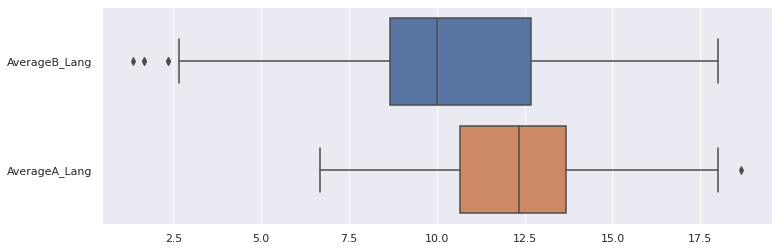

In [68]:
# Moving on to LANGUAGE.
df = pd.concat([pd.DataFrame(schoolB_lang.AverageB_Lang), pd.DataFrame(schoolA_lang.AverageA_Lang)])
f = plt.figure(figsize = (12,4))

sb.boxplot(data = df, orient = 'h')

print("Mean for School A:", schoolA_lang.AverageA_Lang.mean(axis=0).round(2))
print("Mean for School B:", schoolB_lang.AverageB_Lang.mean(axis=0).round(2))

Which school has a better overall student performance in these two subjects? Why do you think that is?

Based on the `mean`, we see that school A (12.24) did `better in language` than school B (10.48). It is also backed up by the `boxplot` where the **1st quartile, median and 3rd quartile** of the boxplot for school A is greater than school B's.

`QUESTION 5`: How do the students perform over time? Are they consistent across terms, or do they gradually improve?

To do this analysis, we look at the term grades individually. We use `mean` and `boxplots`.

[Text(0.5, 0, 'SchoolA')]

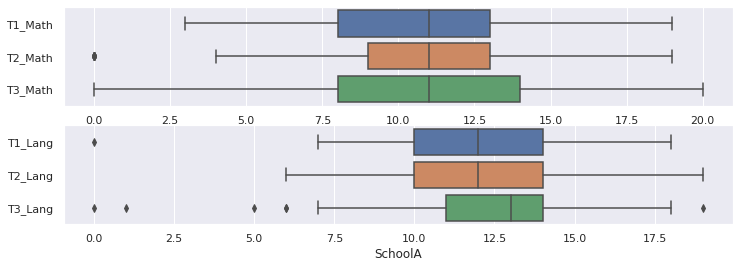

In [69]:
# This is the original boxplots to try detect anomalies.
f, axes = plt.subplots(2,1, figsize = (12,4))
sb.boxplot(data = schoolA_math[['T1_Math', 'T2_Math', 'T3_Math']], orient = 'h', ax = axes[0])
sb.boxplot(data = schoolA_lang[['T1_Lang', 'T2_Lang', 'T3_Lang']], orient = 'h', ax = axes[1]).set(xlabel = 'SchoolA')

In [70]:
# This is the mean section where we see the mean before extracting anomalies and after extracting.
# Also, update the average column to prevent misunderstanding

print("Below is only applicable for SCHOOL A")
print(schoolA_math.describe().round(2).loc['mean'], '\n')
schoolA_math.T2_Math = schoolA_math.T2_Math[schoolA_math.T2_Math > 0]
schoolA_math['AverageA_Math'] = (schoolA_math.T1_Math + schoolA_math.T2_Math + schoolA_math.T3_Math)/3
print("After taking out the students with 0 marks...")
print(schoolA_math.describe().round(2).loc['mean'], '\n')


print(schoolA_lang.describe().round(2).loc['mean'], '\n')
schoolA_lang.T1_Lang = schoolA_lang.T1_Lang[schoolA_lang.T1_Lang > 0]
schoolA_lang.T3_Lang = schoolA_lang.T3_Lang[schoolA_lang.T3_Lang>6]
schoolA_lang.T3_Lang = schoolA_lang.T3_Lang[schoolA_lang.T3_Lang<18.5]
schoolA_lang['AverageA_Lang'] = (schoolA_lang.T1_Lang + schoolA_lang.T2_Lang + schoolA_lang.T3_Lang)/3
print("After taking out the anomaly students...")
print(schoolA_lang.describe().round(2).loc['mean'], '\n')

Below is only applicable for SCHOOL A
T1_Math          10.94
T2_Math          10.78
T3_Math          10.49
AverageA_Math    10.74
Name: mean, dtype: float64 

After taking out the students with 0 marks...
T1_Math          10.94
T2_Math          11.20
T3_Math          10.49
AverageA_Math    11.06
Name: mean, dtype: float64 

T1_Lang          11.99
T2_Lang          12.14
T3_Lang          12.58
AverageA_Lang    12.24
Name: mean, dtype: float64 

After taking out the anomaly students...
T1_Lang          12.01
T2_Lang          12.14
T3_Lang          12.67
AverageA_Lang    12.30
Name: mean, dtype: float64 



**SCHOOL A** (How do the students perform over time? Are they consistent across terms, or do they gradually improve?)

**Math**: The `mean decreased` over time which suggest `deterioration of performance`.    

But looking at the `boxplots`, the `3rd quartile for term 3 is higher than other 2 terms` which suggest that many students also improved. The median remained roughly the same. The probable reason as to why the mean decreased over time could be because the `spread of data for T3 is greater` than the other terms. As to why T2 have a lower mean despite a higher 1st quartile, it could be due to the `students who got 0 marks`. We see that once we take out students with 0 marks, the mean of T2 immediately **shot up**. 

Hence I conclude that for the majority, **students in school A improve in their math grades over time**.

**Lang**: The `mean increased` over time which suggest `improvement`. Even after anomalies are taken out, the pattern of the mean is still the same - it increased over time. This is supported by the `boxplots` where we see that the `1st quartile and median for T3 is higher than the other terms`. 

Hence I conclude that for the majority, **students in school A improve in their language grades over time**.

[Text(0.5, 0, 'SchoolB')]

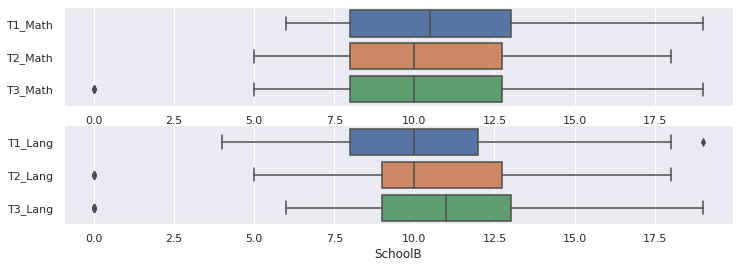

In [71]:
# This is the original boxplots to try detect anomalies.
f, axes = plt.subplots(2,1, figsize = (12,4))
sb.boxplot(data = schoolB_math[['T1_Math', 'T2_Math', 'T3_Math']], orient = 'h', ax = axes[0])
sb.boxplot(data = schoolB_lang[['T1_Lang', 'T2_Lang', 'T3_Lang']], orient = 'h', ax = axes[1]).set(xlabel = 'SchoolB')

In [72]:
# This is the mean section where we see the mean before extracting anomalies and after extracting.
# Also, update the average column to prevent misunderstanding
print("Below is applicable for SCHOOL B")
print(schoolB_math.describe().round(2).loc['mean'], '\n')
schoolB_math.T3_Math = schoolB_math.T3_Math[schoolB_math.T3_Math > 0]
schoolB_math['AverageB_Math'] = (schoolB_math.T1_Math + schoolB_math.T2_Math + schoolB_math.T3_Math)/3
print("After taking out the students with 0 marks...")
print(schoolB_math.describe().round(2).loc['mean'], '\n')

print(schoolB_lang.describe().round(2).loc['mean'], '\n')
schoolB_lang.T1_Lang = schoolB_lang.T1_Lang[schoolB_lang.T1_Lang < 18]
schoolB_lang.T2_Lang = schoolB_lang.T2_Lang[schoolB_lang.T3_Lang > 0]
schoolB_lang.T3_Lang = schoolB_lang.T3_Lang[schoolB_lang.T3_Lang > 0]
schoolB_lang['AverageB_Lang'] = (schoolB_lang.T1_Lang + schoolB_lang.T2_Lang + schoolB_lang.T3_Lang)/3
print("After taking out the anomaly students...")
print(schoolB_lang.describe().round(2).loc['mean'], '\n')

Below is applicable for SCHOOL B
T1_Math          10.67
T2_Math          10.20
T3_Math           9.85
AverageB_Math    10.24
Name: mean, dtype: float64 

After taking out the students with 0 marks...
T1_Math          10.67
T2_Math          10.20
T3_Math          10.79
AverageB_Math    10.84
Name: mean, dtype: float64 

T1_Lang          10.30
T2_Lang          10.50
T3_Lang          10.65
AverageB_Lang    10.48
Name: mean, dtype: float64 

After taking out the anomaly students...
T1_Lang          10.19
T2_Lang          10.96
T3_Lang          11.35
AverageB_Lang    10.85
Name: mean, dtype: float64 



<AxesSubplot:>

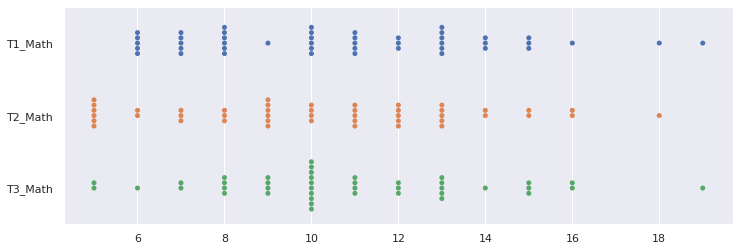

In [73]:
# Employ swarmplot to see the concentration of datapoints
f = plt.figure(figsize = (12,4))
sb.swarmplot(data = schoolB_math[['T1_Math', 'T2_Math', 'T3_Math']], orient = 'h')

**SCHOOL B** (How do the students perform over time? Are they consistent across terms, or do they gradually improve?)

**Math**: Before taking out the students with 0 marks, it seemed like the everyone in the school did worse over time because the `mean` was **decreasing over time**. However after extracting out the students who scored 0 marks, we see that **majority of the students actually improved in T3** and in fact the mean is higher than T1's. However, the `boxplot` revealed that the **median for T3 is lower than T1's** and that imply students generally did better in T1 than T3. Since we have a **contradiction**, let's go a little deeper in the analysis and employ `swarmplot`. 

From the `swarmplot`, we can see why the mean for T3 is higher than T1. It is because there are **fewer data points in the below 8 region**. We see **more students scoring 9 and above**.                   

I conclude that students in school B did **improve in their math performance but not gradually** and that the improvement is `very little`. They did worst in T2 and improved in T3.


**Lang**: The `mean` **improved** over time despite extracting anomaly students. This is supported by the `boxplot` where we see the **1st quartile, median and 3rd quartile moving to the right over time**. This imply `gradual improvement` over time.     
Hence, I conclude that students in school B **improve in their language performance over time**.

`BONUS`: Are there any relationship between one's math performance and language performance?

Given one subject's performance, we will naturally want to know how the person is doing overall rather than just 1 subject. As such, it is relevant to try and understand any relationship between the 2 subjects.

We make use of the `commonstudents` data here because we need students with both math and language performance. We will also make use of correlation. 

In [74]:
# Create a metric to gauge one's performance
commonstudents['MathAverage'] = (commonstudents.T1_Math + commonstudents.T2_Math + commonstudents.T3_Math) / 3
commonstudents['LangAverage'] = (commonstudents.T1_Lang + commonstudents.T2_Lang + commonstudents.T3_Lang) / 3

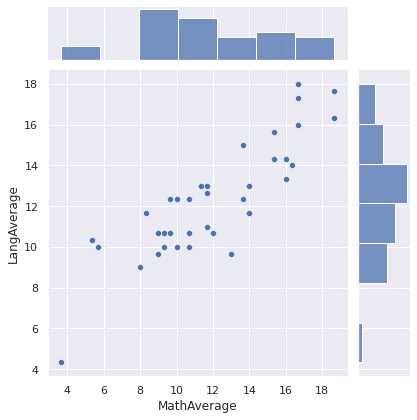

In [75]:
# See the jointplot to try and identify any relationship
sb.jointplot(data = commonstudents[['MathAverage', 'LangAverage']], x = 'MathAverage', y = 'LangAverage')

There seem to be a `linear relationship` between math and language performance. 

We can verify by looking at the correlation between the 2 variables.

In [76]:
commonstudents[['MathAverage', 'LangAverage']].corr().round(2)

,MathAverage,LangAverage
MathAverage,1.00,0.86
LangAverage,0.86,1.00


The correlation is approximately 0.86 which suggest a strong positive linear relationship between math and language performance.

Because there are only 39 datapoints, we will not proceed with linear regression to try and predict one subject's performance when given the other subject's performance.